<a href="https://colab.research.google.com/github/geonextgis/PyTorch-for-Deep-Learning-and-Machine-Learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="20%">

A typical workflow for a machine learning project using PyTorch involves several key steps, from data preparation to model deployment. Below is an outline of a common PyTorch workflow:

1. **Get Data Ready (Turn into Tensors):**<br>
    The first step involves preparing your dataset. This includes loading your data and transforming it into a format that PyTorch can work with, specifically tensors. Tensors are multidimensional arrays that are the basic building blocks in PyTorch, allowing for efficient computation on GPUs.

2. **Build or Pick a Pretrained Model (to Suit Your Problem)**<br>
    In this step, you either build a custom model from scratch or select a pretrained model that fits the task at hand. Pretrained models can be especially useful when working with large, complex datasets like images or text. This step also involves:

    - **Pick a Loss Function & Optimizer**: Selecting an appropriate loss function that the model will try to minimize and choosing an optimizer that will update the model parameters during training.
    - **Build a Training Loop**: Setting up a loop that will iterate over the data in batches, feed it through the model, compute the loss, and adjust the model's parameters to minimize the loss.

3. **Fit the Model to the Data and Make a Prediction**<br>
    In this phase, the model is trained on the prepared data. The training loop defined earlier is executed, allowing the model to learn from the data by minimizing the loss function. Once the model has been trained, it can make predictions on new, unseen data.

4. **Evaluate the Model**<br>
    After training, the model's performance is assessed on a validation or test dataset. This step determines how well the model has learned and whether it generalizes well to new data. The evaluation results help identify any issues, such as overfitting or underfitting.

5. **Improve Through Experimentation**<br>
    Based on the evaluation results, the model may need to be improved. This could involve experimenting with different model architectures, hyperparameters, or data preprocessing techniques. The goal is to fine-tune the model for better performance.

6. **Save and Reload Your Trained Model**<br>
   Once the model has been trained and evaluated successfully, it is saved to disk. This allows you to reload the model later for further training, fine-tuning, or deployment. Saving the model also ensures that you don't need to retrain it every time you want to make predictions.

This workflow is iterative, meaning that based on the results from the evaluation and improvement steps, you may need to loop back and refine earlier stages.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png">


In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "deJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

torch.__version__

'2.3.1+cu121'

## **1. Data Preparation and Loading**
Data can be almost anything... in machine learning.
- Excel spreadsheet
- Images of any kind
- Videos (YouTube has lots of data)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [30]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

## **Splitting Data into Training and Test Sets**

(One of the most important concept in machine learning.)

Let's create a training and test set with our data.

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(8, 5))

    # Plot the training data in plue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot the testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exis
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


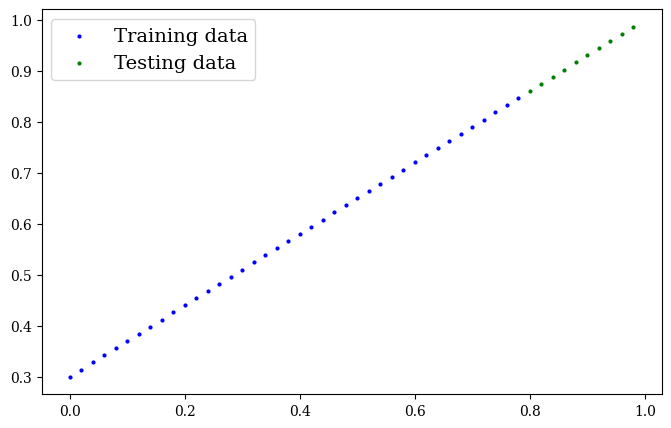

In [6]:
plot_predictions()

## **2. Build the Model**

Our first PyTorch model!

This is very exciting... let's do it!

What our model does:
- Start with random values (weight & bias)
- Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two mail algorithms:
1. Gradient descent
2. Backpropagation

In [15]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                 requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                 dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

        self.bias = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal BIAS
                                              requires_grad=True, # <- can this parameter be updated via gradient descent?
                                              dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # <- this is the linear regression formula

### **PyTorch Model Building Essentials**
- `torch.nn`: contains all of the buildings for computational graphs (a neural network can be considered as a computational graph)
- `torch.nn.Parameter`: what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
- `torch.nn.Modules`: The base class for all neural network modules, if you subclass it, you should overwrite forward()
- `torch.optim`: this is where the optimizers in PyTorch liv, they will help with gradient descent
- `def forward()`: All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation.

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### **Checking the Contents of a PyTorch Model**
Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [25]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [31]:
weight, bias

(0.7, 0.3)

### **Making Prediction using `torch.inference_mode()`**
To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [39]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [41]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [36]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

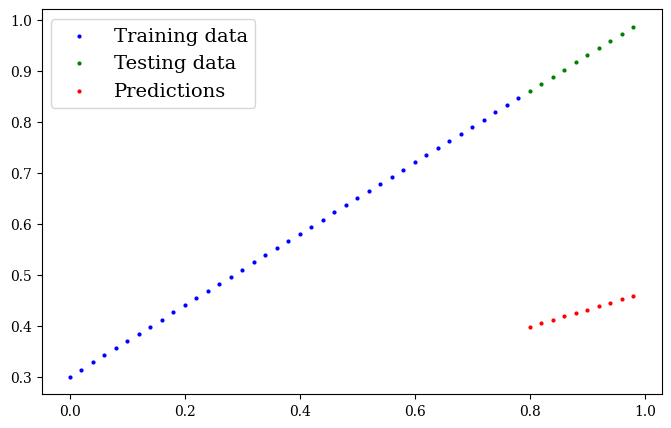

In [42]:
plot_predictions(predictions=y_preds)